In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn import utils

###############################################################################
datainput = pd.read_csv("TAMILNADU_CROP_PRODUCTION.csv")
datainput.head()

,Phosphorus,Nitrogen,Potassium,ph,humidity,temperature,rainfall,crops
0,128,24,196,5.521467,90.694892,22.750888,110.431786,apple
1,144,7,197,6.133221,94.348150,23.849401,114.051249,apple
2,128,14,205,6.226290,94.589006,22.608010,116.039659,apple
3,120,8,201,6.321152,91.134357,21.186674,122.233323,apple
4,129,20,201,5.587906,91.699133,23.410447,116.077793,apple


In [2]:
#label encoder to categorical data 
labelencoder_X = preprocessing.LabelEncoder()
datainput['crops'] = labelencoder_X.fit_transform(datainput['crops'])

In [3]:
x2 = datainput.drop('crops',axis=1)
y = datainput['crops']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x3 = sc.fit_transform(x2)
#Splitting
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=3)

In [4]:
#MULTI LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test) 
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('R2 score  is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score  is  0.29803903744494487
mean_sqrd_error is== 29.032022496293525
root_mean_squared error of is== 5.388137200952991


In [5]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
matrixForLR = confusion_matrix(y_test, y_pred)

print("R2 score =", round(r2_score(y_test, y_pred), 2))
matrix = confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',result)

R2 score = 0.93
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           0       1.00      1.00      1.00        32

   micro avg       1.00      1.00      1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [6]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
print("R2 score =", round(r2_score(y_test, y_pred), 2))
result = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',result)

R2 score = 0.95
Classification report : 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           0       1.00      1.00      1.00        32

   micro avg       0.98      1.00      0.99        64
   macro avg       0.98      1.00      0.99        64
weighted avg       0.98      1.00      0.99        64



In [8]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("R2 score =", round(r2_score(y_test, y_pred), 2))
from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',result)

R2 score = 0.95
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.97      0.98        32
           0       1.00      1.00      1.00        32

   micro avg       1.00      0.98      0.99        64
   macro avg       1.00      0.98      0.99        64
weighted avg       1.00      0.98      0.99        64



[17 16 18 18  9 12 11 18  9  8  5 17 21  4 14 14 14  4 11  2 19 12  7  3
  3 20  3  0  3 16 14 12  5 12  0  1 10  8 18 17 11 20 10  8 12  3  1 21
  2 15  3 20  7  2  6 20 21 11  5 14 18  3  5 10  7 21  2 15 13 15 16  6
 16  3 12  5 20 13 14 19 12 18 16 12  5  9 14  6  1 20  4  2 17  4 13 20
 15  6 12  8 10 20  6 10  9 14 10 16 17  5 10  8  0 18  1 21  4  8  0  1
  4 14 18  6 20  6  6 16  1  8 13 14 16 11  7  2  6 21  7 14  7  5 19 15
  2 16 12  5  9  2 15  2  6 14  6  4 21 11  7 18 10  0  3  0  9  0  0 19
 14 17  0  2  0 16  5 14  2  7 10 15  6  0 10  4 15 16 16  4 12 20 20  5
 18  0 11  4 21 12 14  0 18  4  3 12 21  3  2  6  3  3  0  2  1  8 16  3
  8 18 13  9  8  3 12  9  9 15  0  1  7 13  7  4 19  1 10 21 10 13  2 14
 16 13 13 13  7  7 18  5 12 21 12  6 21 19 21 11 19  2 21  6 18 17  1  2
 21  3  4  8  9  1 17 18 19 19  1 20  5  9  1  8  2 13  8 21 17 10 11 13
  7 11  0 11  4 11 12 14  7  0 21 14  7  3 16 13 11 19  4  5 12  9 13 15
  9 14  8 21 18  8 15 11  9  4  1  1 14  7 17 11 18

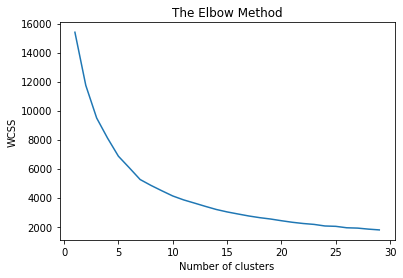

In [9]:
#KMEANS CLUSTERING
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 
print(knn.score(X_test, y_test)) 

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x3)

In [13]:
#RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 101, random_state = 42)
classifier.fit(X_train, y_train)

# Predicting a new result
y_pred = classifier.predict(X_test)

print("R2 score =", round(r2_score(y_test, y_pred), 2))
y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',result)

R2 score = 1.0
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           0       1.00      1.00      1.00        32

   micro avg       1.00      1.00      1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [15]:
import pickle
pickle.dump(classifier, open('tncroprandomforest.pkl', 'wb'))

RMSE value for k=  1 is: 1.3662601021279464
RMSE value for k=  2 is: 1.3035499316261054
RMSE value for k=  3 is: 1.2100866763623854
RMSE value for k=  4 is: 1.149769410347004
RMSE value for k=  5 is: 1.1624165007483853
RMSE value for k=  6 is: 1.2376664259073127
RMSE value for k=  7 is: 1.2873006086935783
RMSE value for k=  8 is: 1.3281266711219433
RMSE value for k=  9 is: 1.3559874015440843
RMSE value for k=  10 is: 1.3879950659243363
RMSE value for k=  11 is: 1.4003282145410658
RMSE value for k=  12 is: 1.4422562582558325
RMSE value for k=  13 is: 1.473743664042361
RMSE value for k=  14 is: 1.4717369281405026
RMSE value for k=  15 is: 1.4961701950397397
RMSE value for k=  16 is: 1.5232183457363815
RMSE value for k=  17 is: 1.558493894451187
RMSE value for k=  18 is: 1.570967423505791
RMSE value for k=  19 is: 1.5852796998274892
RMSE value for k=  20 is: 1.5974672188034142
1.149769410347004


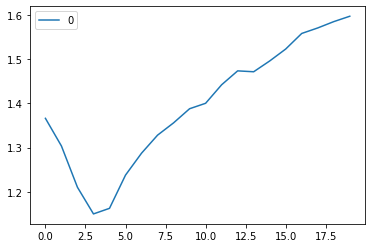

In [11]:
#KNN CLASSIFICATION
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

from sklearn.neighbors import KNeighborsClassifier

regressor = neighbors.KNeighborsRegressor(n_neighbors = 4)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
rmse_val.append(error)

print(error)